In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#renaming columns

In [5]:
cols=customer_df.columns
cols

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
cols=list(map(lambda x: x.lower(),cols))
cols

['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [7]:
cols=list(map(lambda x: x.replace(' ','_'), cols))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [8]:
customer_df.columns=cols
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
customer_df.shape

(9134, 24)

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [11]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [13]:
customer_df.eq(' ').sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
#changing to datetime

In [15]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [16]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
type(customer_df)

pandas.core.frame.DataFrame

In [18]:
customer_df['income'] = customer_df['income'].astype(float)

8. What should we do with the customer_id column? Putting it here  as in real life

In [19]:
customer_df = customer_df.rename(columns={"customer": "customer_id"})
customer_df.set_index("customer_id",inplace=True)

In [20]:
categoricals=customer_df.select_dtypes(object)
numericals=customer_df.select_dtypes(np.number)

In [21]:
cols=numericals.columns

In [22]:
for col in cols:
    print(col, " : ", len(list(numericals[col].unique())))

customer_lifetime_value  :  8041
income  :  5694
monthly_premium_auto  :  202
months_since_last_claim  :  36
months_since_policy_inception  :  100
number_of_open_complaints  :  6
number_of_policies  :  9
total_claim_amount  :  5106


In [23]:
dic={}
    
for col in cols:
    v=len(list(numericals[col].unique()))
    dic[col]=v

In [24]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_id,,,,,,,,
BU79786,2763.519279,56274.0,69,32,5,0,1,384.811147
QZ44356,6979.535903,0.0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767.0,108,18,38,0,2,566.472247
WW63253,7645.861827,0.0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836.0,73,12,44,0,1,138.130879


Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [25]:
df_cat = pd.DataFrame()
df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def diff_concr_discr_cat(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            df_cat[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            df_discr[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            df_cont[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))

In [26]:
continuous_df=df_cont
discrete_df=df_discr

## Lab | Cleaning categorical data

Plot a correlation matrix, what can you see?

- correlation between continous and discrete values, have to be plotted together

- discrete values seems to be independet from each other

- highest correlation between "monthly_premium_auto" and "total_claim_amount"

In [27]:
def corr_matrix(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    corr_matrix=df.corr(method='pearson')  # default
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()

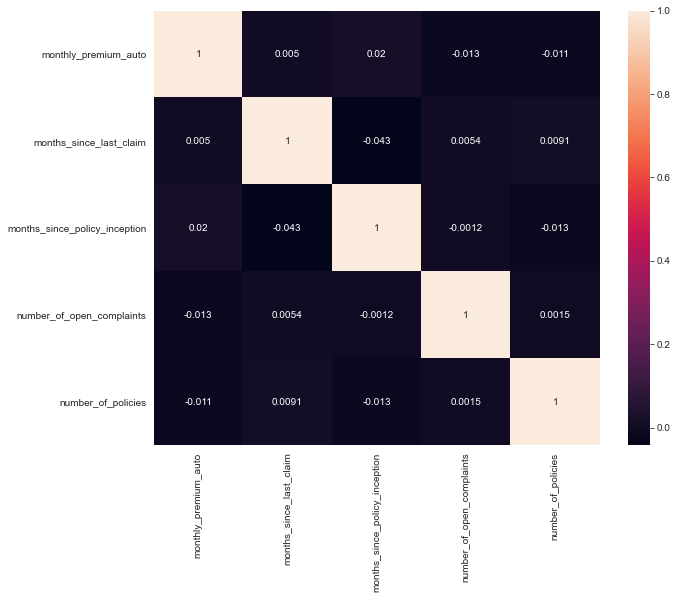

In [28]:
corr_matrix(discrete_df)

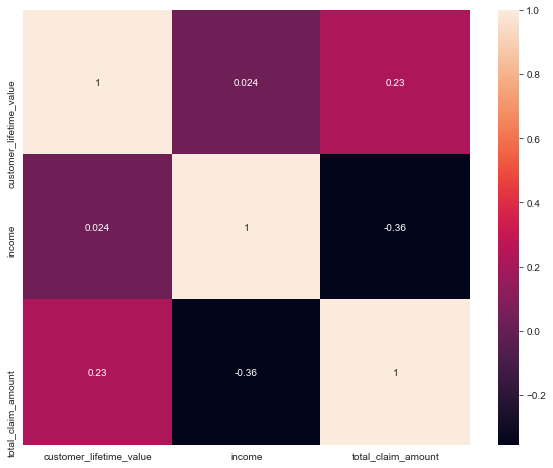

In [29]:
corr_matrix(continuous_df)

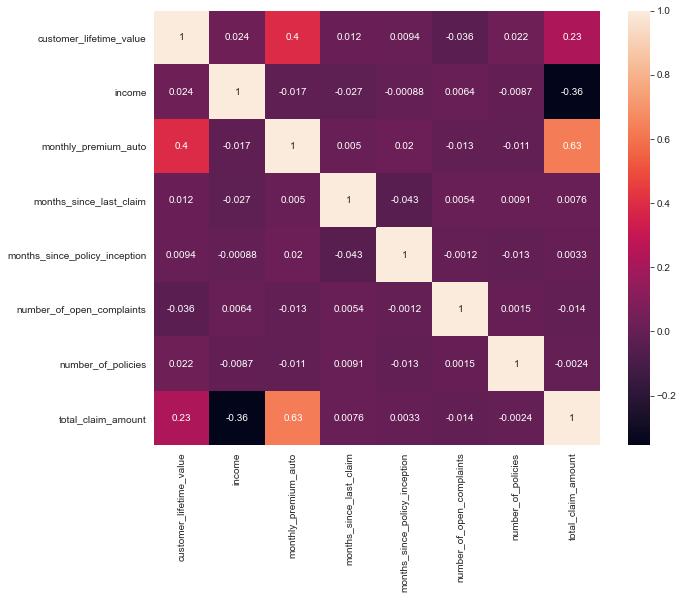

In [30]:
corr_matrix(numericals)

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [31]:
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()

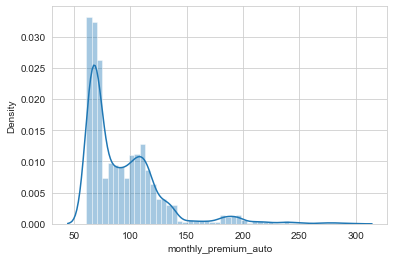

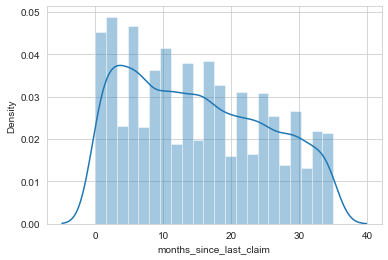

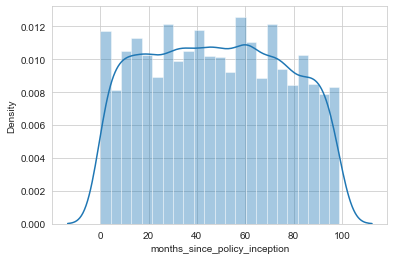

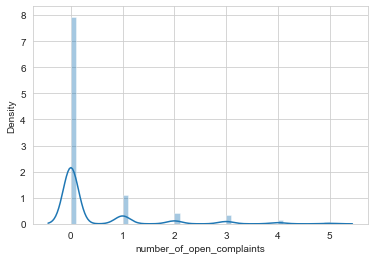

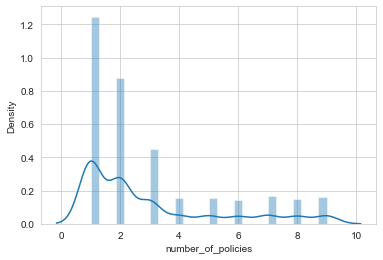

In [32]:
distplot_df(discrete_df)

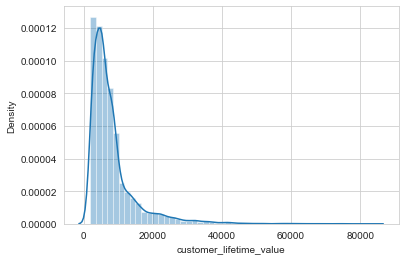

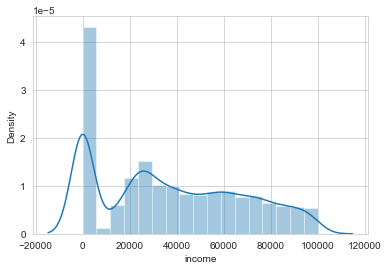

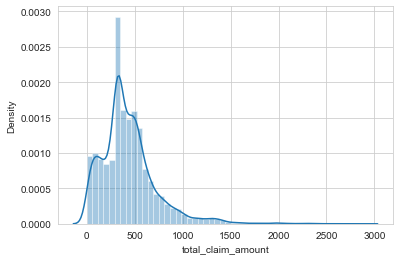

In [33]:
distplot_df(continuous_df)

In [34]:
def countplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    for col in list(df.columns):
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, data=df)
        plt.show()

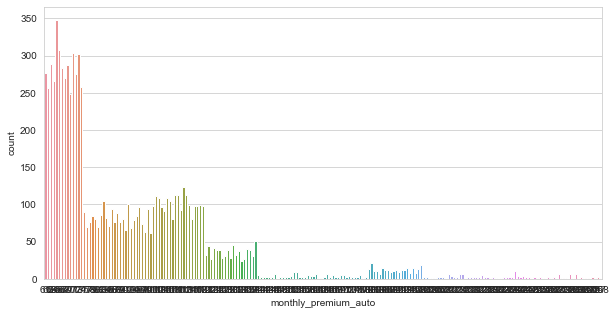

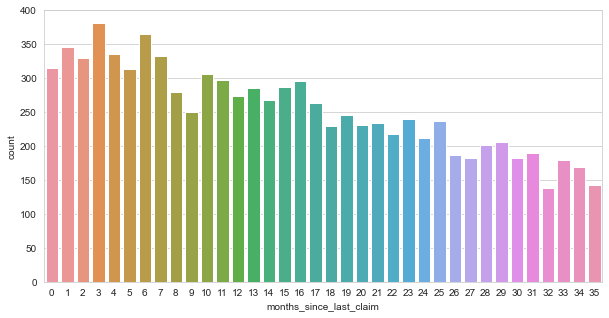

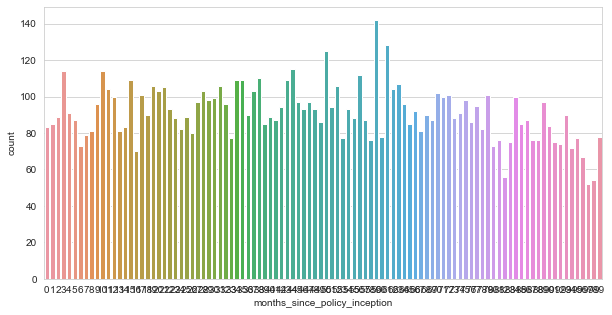

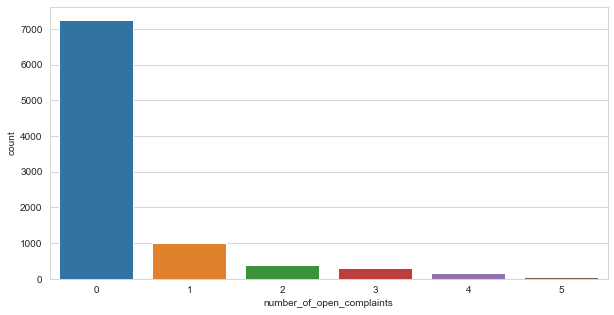

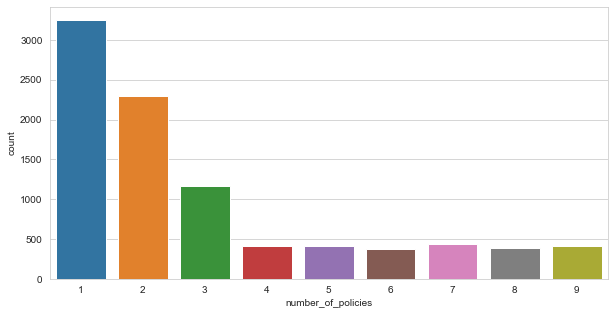

In [35]:
countplot_df(discrete_df)

In [36]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk)) 

In [37]:
skew_df(continuous_df)

the skew of customer_lifetime_value is: 3.0322802599299847
the skew of income is: 0.28688727581189166
the skew of total_claim_amount is: 1.7149658097209557


In [38]:
def boxplot_num(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(x=col, data=df)
        plt.show()

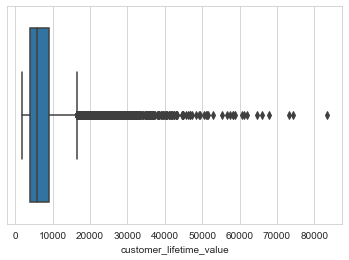

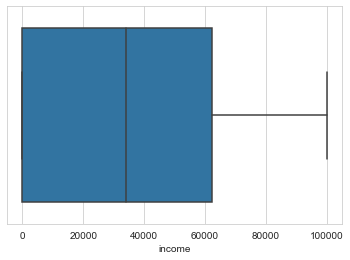

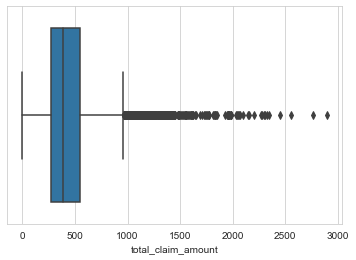

In [39]:
boxplot_num(continuous_df)

Have you found outliers? If you have, what should we do with them?

The positive skew of total_claim_amount is > 1, the positive skew of customer_lifetime_value > 3, apply log transformation for customer_lifetime_value

In [40]:
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [41]:
continuous_df.isnull().sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [42]:
continuous_df.eq(' ').sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [43]:
continuous_df.eq('').sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [44]:
#Log transformation

In [45]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [46]:
continuous_df['customer_lifetime_value'] = list(map(log_transfom_clean_, continuous_df['customer_lifetime_value']))

In [47]:
continuous_df.isna().sum() #sqrt_transfom_clean_ not needed

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

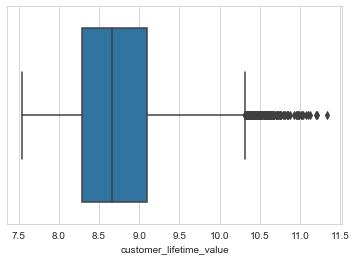

In [48]:
sns.boxplot(x='customer_lifetime_value', data=continuous_df)
plt.show()

10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [49]:
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [53]:
df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [54]:
df_cat["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

- Bucking for "state" or California, Oregan and others, than dummify
- creating oridnals


In [50]:
#other approaches, has to be figured out later

In [80]:
#condition
def identify_data(x):
    # identify empty dataframe
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    categorical = pd.DataFrame()
    
    cols=x.columns
    
    for i in cols: 
        if x[i].dtypes in ['int64','float64']:
            if len(x[i].value_counts()) > 202:
                #print(i)
                continuous_df[i] = x[i]
            else:
                #print(i)
                discrete_df = x[i]
        elif customer_df[i].dtypes == 'object':
            #print(i)
            categorical = x[i]
    return continuous_df, discrete_df, categorical

In [81]:
continuous_df, discrete_df, categorical=identify_data(customer_df)

state
customer_lifetime_value
response
coverage
education
employmentstatus
gender
income
location_code
marital_status
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
policy_type
policy
renew_offer_type
sales_channel
total_claim_amount
vehicle_class
vehicle_size


In [82]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
customer_id,,,
BU79786,2763.519279,56274.0,384.811147
QZ44356,6979.535903,0.0,1131.464935
AI49188,12887.431650,48767.0,566.472247
WW63253,7645.861827,0.0,529.881344
HB64268,2813.692575,43836.0,138.130879


In [84]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   float64
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(3)
memory usage: 543.5+ KB


In [58]:
print(customer_df["state"].dtypes)
print(customer_df["total_claim_amount"].dtypes)
print(customer_df["number_of_open_complaints"].dtypes)

object
float64
int64


In [61]:
type(len(customer_df["state"].value_counts()))

int

In [87]:
def split_numericals (df):
    df_c=pd.DataFrame
    df_d=pd.DataFrame
    
    cols=df.columns
    
    for col in cols:
        
        if df[col].dtypes=="float64":
            df_c[col]=df[col]
            
        elif df[col].dtypes=="int64":
            df_d[col]=df[col]
    
    return df_c, df_d
    

In [89]:
df_c,df_d=split_numericals(customer_df)

TypeError: 'type' object does not support item assignment

In [ ]:
df_c.head()

In [ ]:
df_d.head()

In [ ]:
def cont_disc (df):
    
    dic={}
    for col in cols:
        v=len(list(numericals[col].unique()))
        dic[col]=v
    
    if 
    
    type_x=str(df[col].dtypes)
    
    if type_x=="float64":
                
        #return continous
            
    elif type_x=="int64":
        #continous=False
        if 

In [ ]:
.set_index()